In [ ]:
import pandas as pd
import numpy as np

train = pd.read_csv(""C:\Users\91769\Downloads\train_v9rqX0R.csv"")
test = pd.read_csv(""C:\Users\91769\Downloads\test_AbJTz2l.csv"")
ss = pd.read_csv(""C:\Users\91769\Downloads\sample_submission_8RXa3c6.csv"")

train.shape , test.shape , ss.shape

((8523, 12), (5681, 11), (5681, 3))

In [ ]:
pd.set_option('display.max_columns', 50)
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Data Exploration, EDA

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Univariate Analysis by Sweetviz

In [ ]:
# import sweetviz as sv
# eda = sv.analyze(train)
# eda.show_html('edal.html')

* Item_Identifier - So many unique values see if something can be extracted
* Item_Weight - Numeric , Missing value needs to be treated
* Item_Fat_Content - Convert to boolean
* Item_Visibility - Numeric # Treat the zeroes
* Item_Type - Categoricals
* Item_MRP - Numeric
* Outlet_Identifier - Categoricals
* Outlet_Establishment_Year - Can be dropped
* Outlet_Size - Can be Convert to Numeric ( 1,2,3) , fill missing values
* Outlet_Location_Type - Can be Convert to Numeric ( 1,2,3)
* Outlet_Type - Convert to Numeric ( 0, 1,2,3)

In [ ]:
for col in train.iloc[:,0:21].columns:
    print(col,':',train[col].nunique(),':',train[col].isna().sum())
    #target_mean(train.col,'click_rate_log')

Item_Identifier : 1559 : 0
Item_Weight : 415 : 1463
Item_Fat_Content : 5 : 0
Item_Visibility : 7880 : 0
Item_Type : 16 : 0
Item_MRP : 5938 : 0
Outlet_Identifier : 10 : 0
Outlet_Establishment_Year : 9 : 0
Outlet_Size : 3 : 2410
Outlet_Location_Type : 3 : 0
Outlet_Type : 4 : 0
Item_Outlet_Sales : 3493 : 0


### Target Analysis

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

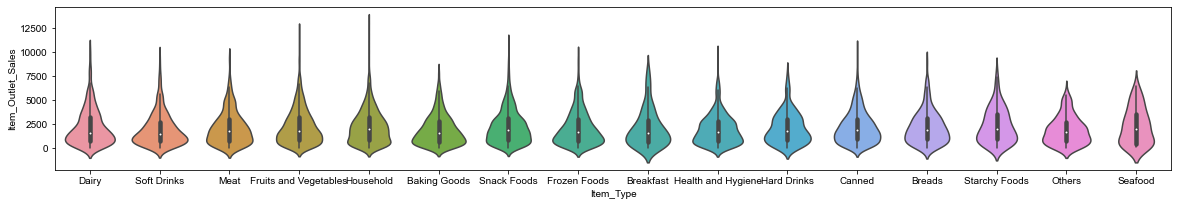

In [ ]:
import seaborn
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 3))
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ="Item_Type", y ="Item_Outlet_Sales",style ="event",data = train)

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

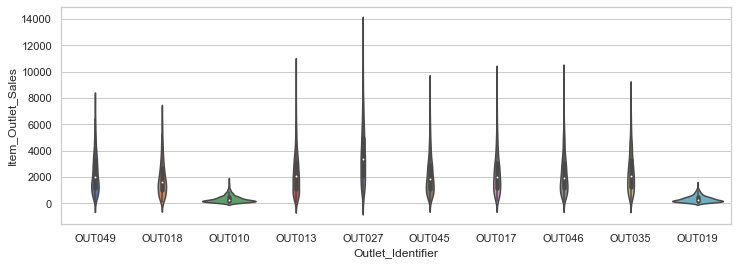

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ="Outlet_Identifier", y ="Item_Outlet_Sales",style ="event",data = train)

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

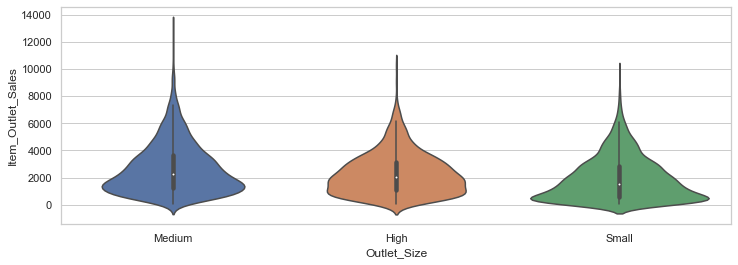

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.violinplot(x ="Outlet_Size", y ="Item_Outlet_Sales",style ="event",data = train)

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

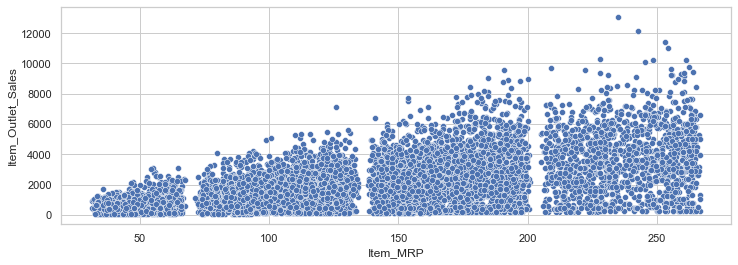

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.scatterplot(x ="Item_MRP", y ="Item_Outlet_Sales",data = train)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

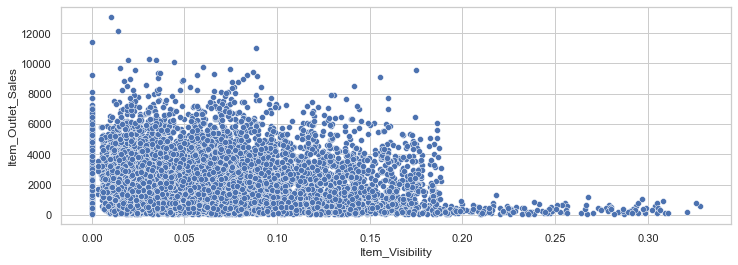

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.scatterplot(x ="Item_Visibility", y ="Item_Outlet_Sales",data = train)

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

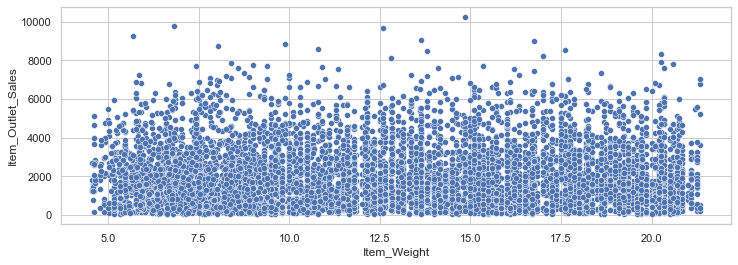

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
seaborn.set(style = 'whitegrid')
seaborn.scatterplot(x ="Item_Weight", y ="Item_Outlet_Sales",data = train)

In [ ]:
train["Item_Weight"] = train["Item_Weight"].fillna(train.Item_Weight.mean())
test["Item_Weight"] = test["Item_Weight"].fillna(test.Item_Weight.mean())

## Data Processsing and Feature Engineering

In [ ]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({ 'Regular':1, 'reg':1,'Low Fat':0,'low fat':0,'LF':0})
train['Item_Visibility'] =  np.where(train['Item_Visibility'] == 0,"NaN",train['Item_Visibility']).astype(float)
train['Item_Identifier'] = train['Item_Identifier'].str.slice(0,2)
train['running'] = 2013 - train['Outlet_Establishment_Year']
train['price/wt'] = train['Item_MRP'] /train['Item_Weight']
train['Outlet_Size'] =  np.where(train['Outlet_Identifier'] == 'OUT010',"Small",train['Outlet_Size'])
train['Outlet_Size'] =  np.where(train['Outlet_Identifier'] == 'OUT017',"Medium",train['Outlet_Size'])
train['Outlet_Size'] =  np.where(train['Outlet_Identifier'] == 'OUT045',"Medium",train['Outlet_Size'])
train['Item_MRP2'] =  np.where(train['Item_MRP'] <69,"A",
                              np.where(train['Item_MRP'] <136,"B",
                                       np.where(train['Item_MRP'] <203,"C","D")))
#train['Item_Visibility2'] =  np.where(train['Item_Visibility'] < 0.19,1,0)



test['Item_Fat_Content']=test['Item_Fat_Content'].replace({ 'Regular':1, 'reg':1,'Low Fat':0,'low fat':0,'LF':0})
test['Item_Visibility'] =  np.where(test['Item_Visibility'] == 0,"NaN",test['Item_Visibility']).astype(float)
test['Item_Identifier'] = test['Item_Identifier'].str.slice(0,2)
test['running'] = 2013 - test['Outlet_Establishment_Year']
test['price/wt'] = test['Item_MRP'] /test['Item_Weight']
test['Outlet_Size'] =  np.where(test['Outlet_Identifier'] == 'OUT010',"Small",test['Outlet_Size'])
test['Outlet_Size'] =  np.where(test['Outlet_Identifier'] == 'OUT017',"Medium",test['Outlet_Size'])
test['Outlet_Size'] =  np.where(test['Outlet_Identifier'] == 'OUT045',"Medium",test['Outlet_Size'])
test['Item_MRP2'] =  np.where(test['Item_MRP'] <69,"A",
                              np.where(test['Item_MRP'] <136,"B",
                                       np.where(test['Item_MRP'] <203,"C","D")))
#test['Item_Visibility2'] =  np.where(test['Item_Visibility'] < 0.19,1,0)

<AxesSubplot:>

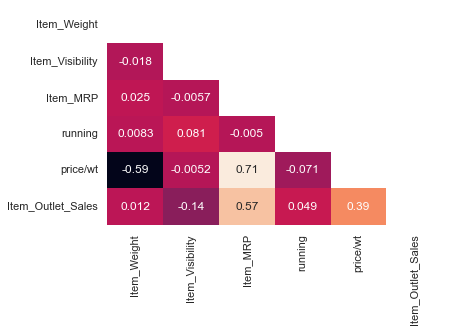

In [ ]:
# Check co-relation with target for numeric columns
import seaborn as sns
import numpy as np
corr=train[['Item_Weight','Item_Visibility','Item_MRP','running','price/wt','Item_Outlet_Sales']].corr()
mask=np.triu(np.ones_like(corr))
sns.heatmap(corr,annot=True,mask=mask,cbar=False)

In [ ]:
y_train = train['Item_Outlet_Sales']
x_train = train.drop(['Item_Outlet_Sales','Outlet_Establishment_Year'],axis=1)

In [ ]:
x_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,running,price/wt,Item_MRP2
0,FD,9.30,0,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,14,26.861204,D
1,DR,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,4,8.153581,A
2,FD,17.50,0,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,14,8.092457,C
3,FD,19.20,1,NaN,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,15,9.484115,C
4,NC,8.93,0,NaN,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,26,6.031512,A


In [ ]:
# x_train = x_train.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna(x.mode()))
# test = test.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x.fillna('NA'))

In [ ]:
from catboost import CatBoostRegressor, Pool
categorical_features =  np.where(x_train.dtypes == object )[0]

def objective(trial,data=x_train,target=y_train):

    train_x, test_x, train_y, test_y = train_test_split(x_train, y_train, test_size=0.15,random_state=42)
    param = {
        'loss_function': 'RMSE',
        #'task_type': 'GPU',
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'max_bin': trial.suggest_int('max_bin', 200, 400),
        #'rsm': trial.suggest_uniform('rsm', 0.3, 1.0),
        'subsample': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.006, 0.018),
        'n_estimators':  1000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15]),
        'random_state': trial.suggest_categorical('random_state', [2020]),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
    }
    model = CatBoostRegressor(**param,cat_features=categorical_features)

    model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=200,verbose=False)

    preds = model.predict(test_x)

    rmse = mean_squared_error(test_y, preds,squared=False)

    return rmse

In [ ]:
# import optuna
# from sklearn.model_selection import KFold
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=5)
# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)

In [ ]:
Best_trial = {'l2_leaf_reg': 0.001061926310,'max_bin': 322,
 'learning_rate': 0.01081467174,'max_depth': 5,'random_state': 2020,'min_data_in_leaf': 163,
              'loss_function': 'RMSE','n_estimators':  1000}

In [ ]:
from catboost import CatBoostRegressor, Pool
categorical_features =  np.where(x_train.dtypes == object )[0]

model = CatBoostRegressor(**Best_trial,cat_features=categorical_features)
model.fit(x_train, y_train)
test_pred = model.predict(test[x_train.columns)]

0:	learn: 1696.5184236	total: 168ms	remaining: 2m 47s
1:	learn: 1686.3506974	total: 200ms	remaining: 1m 39s
2:	learn: 1675.8159590	total: 234ms	remaining: 1m 17s
3:	learn: 1666.1200752	total: 266ms	remaining: 1m 6s
4:	learn: 1656.1390304	total: 304ms	remaining: 1m
5:	learn: 1646.1853280	total: 338ms	remaining: 56s
6:	learn: 1636.5468913	total: 370ms	remaining: 52.5s
7:	learn: 1626.8701162	total: 406ms	remaining: 50.4s
8:	learn: 1617.4910508	total: 439ms	remaining: 48.4s
9:	learn: 1608.1377884	total: 471ms	remaining: 46.6s
10:	learn: 1598.9391184	total: 518ms	remaining: 46.6s
11:	learn: 1589.8412201	total: 552ms	remaining: 45.5s
12:	learn: 1580.9399117	total: 587ms	remaining: 44.6s
13:	learn: 1572.3051193	total: 619ms	remaining: 43.6s
14:	learn: 1563.7949075	total: 650ms	remaining: 42.7s
15:	learn: 1555.3858435	total: 682ms	remaining: 42s
16:	learn: 1546.9227814	total: 716ms	remaining: 41.4s
17:	learn: 1538.7294593	total: 748ms	remaining: 40.8s
18:	learn: 1530.6940051	total: 780ms	remai

158:	learn: 1110.0240177	total: 5.32s	remaining: 28.2s
159:	learn: 1109.2984092	total: 5.36s	remaining: 28.1s
160:	learn: 1108.7278565	total: 5.39s	remaining: 28.1s
161:	learn: 1108.2495205	total: 5.42s	remaining: 28s
162:	learn: 1107.6969298	total: 5.45s	remaining: 28s
163:	learn: 1107.2152259	total: 5.48s	remaining: 27.9s
164:	learn: 1106.5682625	total: 5.51s	remaining: 27.9s
165:	learn: 1106.0014744	total: 5.55s	remaining: 27.9s
166:	learn: 1105.3664354	total: 5.58s	remaining: 27.8s
167:	learn: 1104.7561568	total: 5.61s	remaining: 27.8s
168:	learn: 1104.1405587	total: 5.64s	remaining: 27.7s
169:	learn: 1103.5538966	total: 5.67s	remaining: 27.7s
170:	learn: 1103.0007661	total: 5.71s	remaining: 27.7s
171:	learn: 1102.4191896	total: 5.75s	remaining: 27.7s
172:	learn: 1101.9149499	total: 5.78s	remaining: 27.6s
173:	learn: 1101.4129741	total: 5.82s	remaining: 27.6s
174:	learn: 1100.8483337	total: 5.85s	remaining: 27.6s
175:	learn: 1100.3609795	total: 5.88s	remaining: 27.5s
176:	learn: 10

313:	learn: 1072.5590181	total: 10.6s	remaining: 23.2s
314:	learn: 1072.4609250	total: 10.7s	remaining: 23.2s
315:	learn: 1072.4027401	total: 10.7s	remaining: 23.2s
316:	learn: 1072.3121329	total: 10.8s	remaining: 23.2s
317:	learn: 1072.2547175	total: 10.8s	remaining: 23.2s
318:	learn: 1072.1610337	total: 10.8s	remaining: 23.1s
319:	learn: 1072.1070328	total: 10.9s	remaining: 23.1s
320:	learn: 1072.0475851	total: 10.9s	remaining: 23.1s
321:	learn: 1071.9894918	total: 11s	remaining: 23.1s
322:	learn: 1071.9095000	total: 11s	remaining: 23.1s
323:	learn: 1071.8414727	total: 11.1s	remaining: 23.1s
324:	learn: 1071.7967742	total: 11.1s	remaining: 23s
325:	learn: 1071.6969299	total: 11.1s	remaining: 23s
326:	learn: 1071.6521094	total: 11.2s	remaining: 23s
327:	learn: 1071.5730422	total: 11.2s	remaining: 22.9s
328:	learn: 1071.5584801	total: 11.2s	remaining: 22.9s
329:	learn: 1071.5005032	total: 11.3s	remaining: 22.9s
330:	learn: 1071.4659233	total: 11.3s	remaining: 22.9s
331:	learn: 1071.415

464:	learn: 1065.3803198	total: 16.3s	remaining: 18.8s
465:	learn: 1065.3419606	total: 16.3s	remaining: 18.7s
466:	learn: 1065.3321646	total: 16.4s	remaining: 18.7s
467:	learn: 1065.3074635	total: 16.4s	remaining: 18.7s
468:	learn: 1065.2767263	total: 16.5s	remaining: 18.6s
469:	learn: 1065.2308428	total: 16.5s	remaining: 18.6s
470:	learn: 1065.2105475	total: 16.5s	remaining: 18.6s
471:	learn: 1065.1345654	total: 16.6s	remaining: 18.6s
472:	learn: 1065.0616606	total: 16.6s	remaining: 18.5s
473:	learn: 1065.0362656	total: 16.7s	remaining: 18.5s
474:	learn: 1064.9628226	total: 16.7s	remaining: 18.5s
475:	learn: 1064.9448988	total: 16.8s	remaining: 18.4s
476:	learn: 1064.8974325	total: 16.8s	remaining: 18.4s
477:	learn: 1064.8597205	total: 16.8s	remaining: 18.4s
478:	learn: 1064.8556625	total: 16.9s	remaining: 18.3s
479:	learn: 1064.7904085	total: 16.9s	remaining: 18.3s
480:	learn: 1064.7422821	total: 16.9s	remaining: 18.3s
481:	learn: 1064.6598466	total: 17s	remaining: 18.2s
482:	learn: 

617:	learn: 1059.8511031	total: 22.2s	remaining: 13.7s
618:	learn: 1059.8159661	total: 22.2s	remaining: 13.7s
619:	learn: 1059.7568509	total: 22.3s	remaining: 13.7s
620:	learn: 1059.7153660	total: 22.3s	remaining: 13.6s
621:	learn: 1059.7070585	total: 22.4s	remaining: 13.6s
622:	learn: 1059.6544358	total: 22.4s	remaining: 13.6s
623:	learn: 1059.6400327	total: 22.5s	remaining: 13.5s
624:	learn: 1059.6108703	total: 22.5s	remaining: 13.5s
625:	learn: 1059.5428524	total: 22.5s	remaining: 13.5s
626:	learn: 1059.5098008	total: 22.6s	remaining: 13.4s
627:	learn: 1059.4933617	total: 22.6s	remaining: 13.4s
628:	learn: 1059.4839978	total: 22.6s	remaining: 13.3s
629:	learn: 1059.4839952	total: 22.6s	remaining: 13.3s
630:	learn: 1059.4709300	total: 22.7s	remaining: 13.3s
631:	learn: 1059.4452075	total: 22.7s	remaining: 13.2s
632:	learn: 1059.3507536	total: 22.8s	remaining: 13.2s
633:	learn: 1059.2860108	total: 22.8s	remaining: 13.2s
634:	learn: 1059.2325810	total: 22.8s	remaining: 13.1s
635:	learn

769:	learn: 1055.2594150	total: 28.2s	remaining: 8.41s
770:	learn: 1055.2110028	total: 28.2s	remaining: 8.37s
771:	learn: 1055.1875702	total: 28.2s	remaining: 8.34s
772:	learn: 1055.1429689	total: 28.3s	remaining: 8.3s
773:	learn: 1055.1333287	total: 28.3s	remaining: 8.26s
774:	learn: 1055.0884894	total: 28.3s	remaining: 8.22s
775:	learn: 1055.0479454	total: 28.4s	remaining: 8.19s
776:	learn: 1054.9759915	total: 28.4s	remaining: 8.15s
777:	learn: 1054.8910658	total: 28.4s	remaining: 8.11s
778:	learn: 1054.8675454	total: 28.5s	remaining: 8.08s
779:	learn: 1054.7770193	total: 28.5s	remaining: 8.04s
780:	learn: 1054.7647370	total: 28.5s	remaining: 8s
781:	learn: 1054.7254224	total: 28.6s	remaining: 7.96s
782:	learn: 1054.6958577	total: 28.6s	remaining: 7.93s
783:	learn: 1054.6355541	total: 28.6s	remaining: 7.89s
784:	learn: 1054.6295886	total: 28.7s	remaining: 7.85s
785:	learn: 1054.5822834	total: 28.7s	remaining: 7.82s
786:	learn: 1054.5465909	total: 28.7s	remaining: 7.78s
787:	learn: 10

919:	learn: 1049.6475625	total: 33.5s	remaining: 2.92s
920:	learn: 1049.6385426	total: 33.6s	remaining: 2.88s
921:	learn: 1049.6043789	total: 33.6s	remaining: 2.84s
922:	learn: 1049.5880960	total: 33.6s	remaining: 2.81s
923:	learn: 1049.5584808	total: 33.7s	remaining: 2.77s
924:	learn: 1049.5173596	total: 33.7s	remaining: 2.73s
925:	learn: 1049.4336415	total: 33.7s	remaining: 2.69s
926:	learn: 1049.3644763	total: 33.8s	remaining: 2.66s
927:	learn: 1049.3334624	total: 33.8s	remaining: 2.62s
928:	learn: 1049.3204890	total: 33.8s	remaining: 2.58s
929:	learn: 1049.3028581	total: 33.9s	remaining: 2.55s
930:	learn: 1049.2541947	total: 33.9s	remaining: 2.51s
931:	learn: 1049.2375557	total: 33.9s	remaining: 2.48s
932:	learn: 1049.2186602	total: 34s	remaining: 2.44s
933:	learn: 1049.1912700	total: 34s	remaining: 2.4s
934:	learn: 1049.1459892	total: 34s	remaining: 2.37s
935:	learn: 1049.1097698	total: 34.1s	remaining: 2.33s
936:	learn: 1049.0773863	total: 34.1s	remaining: 2.29s
937:	learn: 1049.

In [5]:
test_pred = model.predict(test[x_train.columns])
test_pred[test_pred<33]=33
ss['Item_Outlet_Sales'] = test_pred
ss.to_csv('bigmart.csv',index=False)
ss.head()

NameError: ignored

In [ ]:
#_Sales'],ascending=False).head(20)